In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

α  = 1.0 / 3 # span of control for production function
β = 0.96 # discount factor
γ = 1.0 # risk aversion
δ = 0.1 # depreciation rate of capital 


# Total factor of productivity

# z : productivity shock

z_grid = np.array([-0.1, 0, 0.1]) # z states
n_z = len(z_grid) # number of states

# transition matrix
P = np.array([
    [0.8, 0.15, 0.05],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])

n_k = 100
k_min = 0.01
k_max = 6.0
k_grid = np.linspace(k_min, k_max, n_k) # levels of capital

### Utility Function

Constant Relative Risk Aversion (CRRA):

$$
u(c,\gamma) = \frac{c^{1-\gamma}}{1-\gamma} \\
\lim_{\gamma \to 1}\frac{c^{1-\gamma}}{1-\gamma} = \log(c)
$$

In [3]:
# utility function

def u(c, γ):
    '''
    c : consumption
    gamma : risk aversion
    '''
    if c < 0: # no negative consumption

        return -1e10 # large negative
    
    elif γ == 1.0: # limit as 
        return np.log(c)
    
    else:
        return (c**(1 - γ)) / (1 - γ)
    
def f(z, k, α):
    '''
    z : productivity shock (-1, 0, 1)
    k : capital
    α : < 1 "span of control" ("effectiveness" of capital)
    '''
    return np.exp(z) * (k**α)

### Production Function

Cobb-Douglas (capital only/no labor component):

$$
f(z, k) = e^{z}k^{\alpha}, \alpha < 1
$$

In [4]:
def f(z, k, α):
    '''
    z : productivity shock (-1, 0, 1)
    k : capital
    α : < 1 "span of control" ("effectiveness" of capital)
    '''
    return np.exp(z) * (k**α)

#### Parameters

Based on annaul calibrations

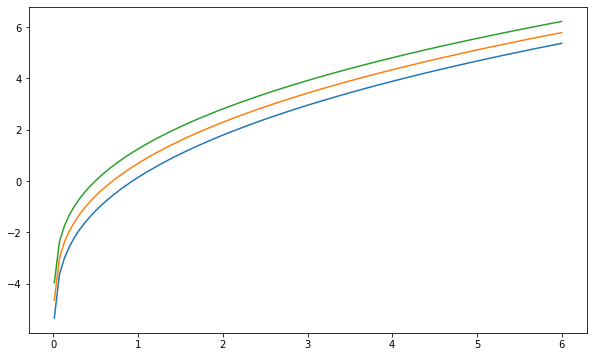

Wall time: 21.5 s


In [5]:
%%time

T = 100
V = np.zeros((T, n_z, n_k))
policy = np.zeros((n_z, n_k))

for i in range(T-1): # value function iteratior
    
    for j in range(n_z): # z shocks
        
        for k in range(n_k): # for each current capital state
            
            V[i+1, j, k] = -1e10 # set as dummy that will automatically get overriden
            
            for kp in range(n_k):  # k_prime
                
                # consumption = production - investment (k' - (1 - δ)k)
                c = f(z_grid[j], k_grid[k], α) - (k_grid[kp] - (1 - δ) * k_grid[k])
                
                # u(c) + E[V(z', k')]
                tmp = u(c, γ) + β * np.dot(P[j], V[i, : , kp])
                
                # if value better than any previous choice
                if (tmp > V[i+1, j, k]):
                    V[i + 1, j, k] = tmp # reassign as temp value
                    policy[j, k] = k_grid[kp] # leave this much for capital next period
                    
plt.figure(figsize = (10, 6))
plt.plot(k_grid, V[T - 1, :, :].T)
plt.show()

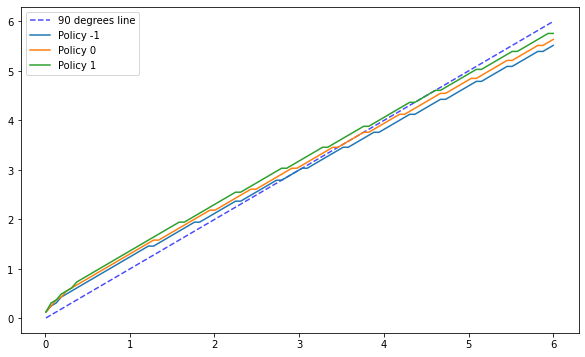

In [6]:
plt.figure(figsize = (10, 6))

plt.plot(k_grid, k_grid, "b--", alpha = 0.7)
plt.plot(k_grid, policy.T)

plt.legend(['90 degrees line', 'Policy -1', 'Policy 0', 'Policy 1'])

plt.show()

In [7]:

α  = 1.0 / 3 # span of control for production function
β = 0.96 # discount factor
γ = 1.0 # risk aversion
δ = 0.1 # depreciation rate of capital 


# Total factor of productivity

# z : productivity shock

z_grid = np.array([-0.02, 0, 0.02]) # z states
n_z = len(z_grid) # number of states

# transition matrix
P = np.array([
    [0.8, 0.15, 0.05],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])

n_k = 100
k_min = 0.01
k_max = 6.0
k_grid = np.linspace(k_min, k_max, n_k) # levels of capital

def u(c, γ):
    if γ == 1:
        res = np.log(c)
    else:
        res = ( c ** (1 - γ)) / (1 - γ)
        
    res[np.isnan(res)] = -1e10
    
    return res


def f(z, k, α):
    '''
    z : productivity shock (-1, 0, 1)
    k : capital
    α : < 1 "span of control" ("effectiveness" of capital)
    '''
    return np.exp(z) * (k**α)

<timed exec>:20: RuntimeWarning: invalid value encountered in log


Converge in 157 iterations


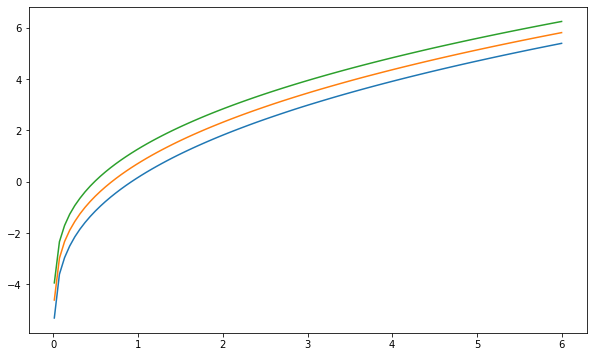

Wall time: 1.13 s


In [8]:
%%time
# Make a grid
n_k = 100
k_min = 0.01
k_max = 6.0
k_grid = np.linspace(k_min, k_max, n_k)

# Parameterization
alpha = 1.0 / 3
beta = 0.96
gamma = 1.0
delta = 0.1

# A very simple z process
n_z = 3
z_grid = np.array([-0.1, 0, 0.1])
P = np.array([[0.8, 0.15, 0.05], [0.1, 0.8, 0.1], [0.05, 0.15, 0.8]])

def u(c, gamma):
    if (gamma == 1.0):
        res = np.log(c)
    else:
        res = (c ** (1 - gamma)) / (1 - gamma)
    
    res[np.isnan(res)] = -1e10
    
    return res

# Vectorize some operations
T = 1000
V = np.zeros((T, n_z, n_k))
policy = np.zeros((n_z, n_k))

for i in range(T - 1):
    for j in range(n_z):
        for k in range(n_k):
            
            c = f(z_grid[j], k_grid[k], alpha) + (1 - delta) * k_grid[k] - k_grid
            
            tmp = u(c, gamma) + beta * np.dot(P[j, :], V[i, :, :])
            
            V[i + 1, j, k] = np.max(tmp)
            
            policy[j, k] = k_grid[np.argmax(tmp)]
    
    # Check convergence
    diff = np.max(np.abs(V[i + 1, :, :] - V[i, :, :]))
    if (diff < 1e-4):
        V_converge = V[i, :, :]
        print(f"Converge in {i} iterations")
        break
        
        
plt.figure(figsize = (10, 6))
plt.plot(k_grid, V_converge.T)
plt.show()

In [9]:
alpha = α
delta = δ
beta = β
gamma = γ

In [10]:
%%time

# Vectorize some operations
T = 1000
V = np.zeros((T, n_z, n_k))
policy = np.zeros((n_z, n_k))

for i in range(T - 1):
    for j in range(n_z):
        for k in range(n_k):
            
            c_grid = f(z_grid[j], k_grid[k], alpha) + (1 - delta) * k_grid[k] - k_grid
            
            tmp = u(c_grid, gamma) + beta * np.dot(P[j, :], V[i, :, :])
            
            V[i + 1, j, k] = np.max(tmp)
            
            policy[j, k] = k_grid[np.argmax(tmp)]
    
    # Check convergence
    diff = np.max(np.abs(V[i + 1, :, :] - V[i, :, :]))
    if (diff < 1e-4):
        V_converge = V[i, :, :]
        print(f"Converge in {i} iterations")
        break

<timed exec>:20: RuntimeWarning: invalid value encountered in log


Converge in 157 iterations
Wall time: 1.23 s


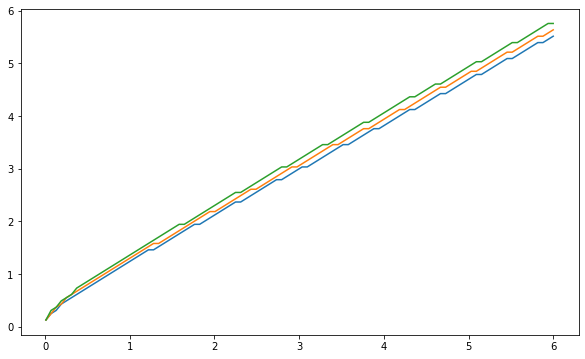

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(k_grid, policy.T)
plt.show()

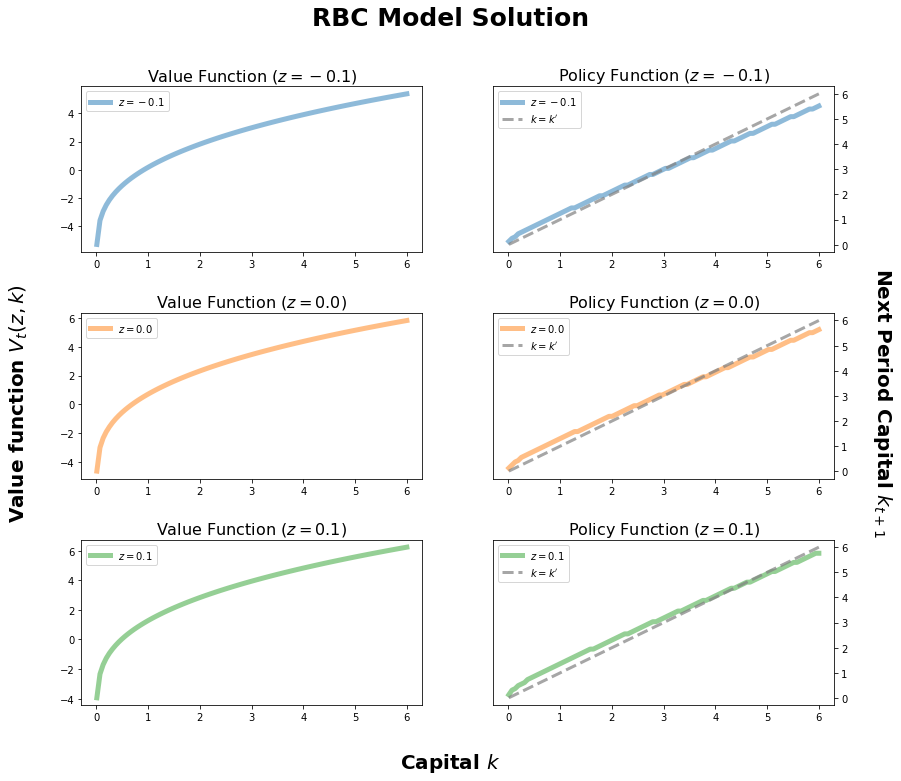



Results Table
--------------------------------------------------


,Value V(z = -0.1),Value V(z = 0.0),Value V(z = 0.1),Policy k'(z = -0.1),Policy k'(z = 0.0),Policy k'(z = 0.1)
k (capital),,,,,,
0.010000,-5.310981,-4.611205,-3.943826,0.131010,0.131010,0.131010
0.554545,-0.951225,-0.375664,0.213093,0.796566,0.857071,0.917576
1.099091,0.370301,0.910466,1.466387,1.341111,1.401616,1.462121
1.643636,1.306865,1.822287,2.352993,1.825152,1.885657,1.946162
2.188182,2.057482,2.553682,3.065838,2.309192,2.369697,2.490707
2.732727,2.694400,3.174887,3.671423,2.793232,2.853737,2.974747
3.277273,3.254006,3.719975,4.203481,3.216768,3.337778,3.458788
3.821818,3.755699,4.209343,4.681053,3.700808,3.761313,3.882323
4.366364,4.212049,4.655732,5.116854,4.124343,4.245354,4.366364


In [18]:
# formatting
import pandas as pd
textbf = lambda x: '\033[1m'+str(x)+'\033[0m'

plot_fmt = dict(alpha=0.5, lw=5)
title_fmt = dict(fontsize=16)
label_fmt = dict(fontsize=20, fontweight='bold')

# plt default colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot each series in own axis
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.tight_layout(pad=4)

for i, z in enumerate(z_grid):

    # plot value function
    ax[i][0].plot(k_grid, V_converge[i],
                  **plot_fmt, label=f'$z = {z}$', c=colors[i])
    
    # plot policy function
    ax[i][1].plot(k_grid, policy[i],
                  **plot_fmt, label=f'$z = {z}$', c=colors[i])
    
    # k = k' 90 degree line
    ax[i][1].plot(k_grid, k_grid,
                  ls='--', lw=3, c='gray', alpha=0.7,
                  label='$k = k\'$')
    
    ax[i][0].legend()
    ax[i][1].legend()
    
    ax[i][0].set_title(f'Value Function $(z = {z})$', **title_fmt)
    ax[i][1].set_title(f'Policy Function $(z = {z})$', **title_fmt)
    ax[i][1].yaxis.tick_right()
    
# labels
fig.text(0, 0.5, 'Value function $V_t(z, k)$',
         verticalalignment='center',
         horizontalalignment='center',
         rotation=90,
         **label_fmt
        )

fig.text(1, 0.5, 'Next Period Capital $k_{t+1}$',
         verticalalignment='center',
         horizontalalignment='center',
         rotation=-90,
         **label_fmt
        )

fig.text(0.5, 0, 'Capital $k$',
         verticalalignment='center',
         horizontalalignment='center',
         **label_fmt
        )

fig.suptitle('RBC Model Solution',
             y=1.05,
             fontsize=25,
             fontweight='bold'
            )

plt.show()


# reorganize results in pandas
v_res, p_res = {}, {}
for v, p, z in zip(V, policy, z_grid):
    v_res[f'Value V(z = {z})'] = v
    p_res[f'Policy k\'(z = {z})'] = p

v_res.update(p_res)

df = pd.DataFrame(v_res, index=k_grid)
df.index.name = 'k (capital)'


print('\n')
print(textbf('Results Table'))
print(textbf('-'*50))

display(df[::9]) # show every ninth row